In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Read CSV file and remove OFL and MAR events
csv = pd.read_csv('output_out.txt', 
                  dtype=str,
                  delim_whitespace=True,
                  usecols=['event', 'channel', 'truetime/ps'])
csv = csv[~csv['event'].isin(['OFL', 'MAR'])]
csv = csv.astype({'event': str, 'channel': int, 'truetime/ps': int})

In [71]:
# Locate 0->1 or 1->0 events
two_photon_events = np.nonzero(np.diff(csv['channel']))

# Calculate time delay between 0->1 and 1->0 events
time_delay = np.diff(csv['truetime/ps'].iloc[two_photon_events])

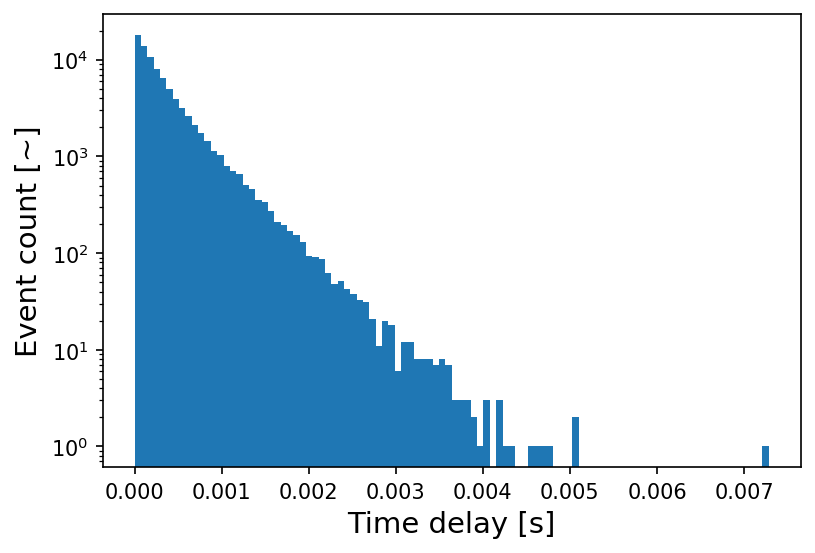

In [72]:
plt.figure(dpi=150)
plt.hist(time_delay / 1e12, bins=100, log=True)
plt.xlabel('Time delay [s]', fontsize=14)
plt.ylabel('Event count [~]', fontsize=14)
plt.savefig('time_delay.png', dpi=150, bbox_inches='tight')